In [1]:
import pandas as pd, numpy as np, seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
dset = datasets.load_iris()
X = pd.DataFrame(dset.data, columns=dset.feature_names)
_y = dset.target
_yname = np.asarray(dset.target_names)[_y]
Y = pd.DataFrame({'class': _y, 'class_name': _yname})

In [3]:
X.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
40,5.0,3.5,1.3,0.3
79,5.7,2.6,3.5,1.0
123,6.3,2.7,4.9,1.8
106,4.9,2.5,4.5,1.7
31,5.4,3.4,1.5,0.4


In [4]:
Y.sample(5)

,class,class_name
42,0,setosa
20,0,setosa
73,1,versicolor
34,0,setosa
57,1,versicolor


In [56]:
def plot_radar(labels, values, fig=None, title='', AXIS_BOX=[0.1,0.1,0.9,0.9]):
    angles_deg = np.linspace(0, 360, len(labels), endpoint=False)
    angles_rad = np.linspace(0, 2*np.pi, len(labels) + 1, endpoint=True)
    fig = fig or plt.figure()
    
    for label, angle in zip(labels, angles_deg):
        ax = fig.add_axes(AXIS_BOX, polar=True, label=label)
        ax.tick_params(axis='both', which='major', rotation=angle - 90)
        ax.set_rticks([])
        ax.set_thetagrids([angle], labels=[label])
    
    ax = fig.add_axes(AXIS_BOX, polar=True, label='base')
    ax.set_rticks([])
    ax.set_thetagrids(angles_deg, labels=[])
    if title:
        ax.set_title(title)

    values = [v for v in values]
    values = values + values[:1]
    ax.plot(angles_rad, values, linewidth=1, linestyle='solid')
    ax.fill(angles_rad, values, 'b', alpha=0.1)
    return


def plot_ex_at(Xdf, Ydf, k):
    plot_radar(Xdf.columns, Xdf.iloc[k].as_matrix(), title=Ydf.iloc[k, 'class_name'])
    return

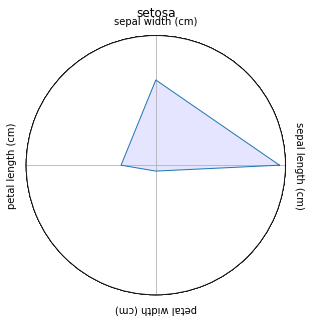

In [57]:
plot_ex_at(X, Y, 0)

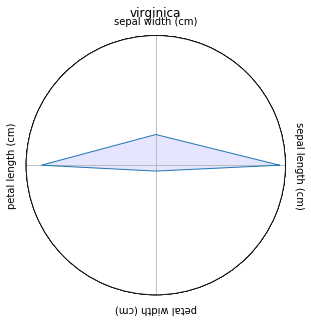

In [58]:
plot_ex_at(X, Y, 100)

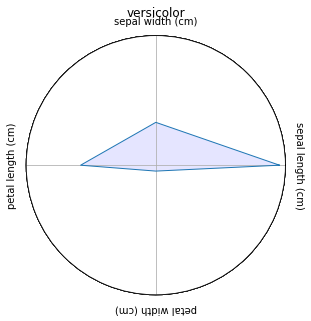

In [61]:
plot_ex_at(X, Y, 74)

In [63]:
import shap, sklearn
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)
svc_linear = sklearn.svm.SVC(kernel='linear', probability=True)
svc_linear.fit(Xtrain, Ytrain['class'])
kernelexp = shap.KernelExplainer(svc_linear.predict_proba, Xtrain)


In [70]:
shap_values = kernelexp.shap_values(Xtest.iloc[[0]])
shap_class1, shap_class2, shap_class3 = shap_values

100%|██████████| 1/1 [00:00<00:00, 40.79it/s]


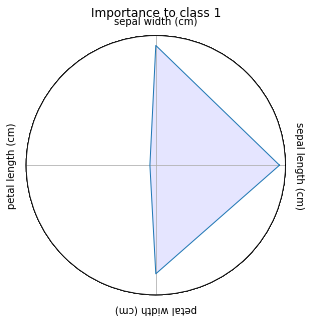

In [75]:
plot_radar(X.columns, (shap_class1[0, :-1] + 1)/2, title='Importance to class 1')

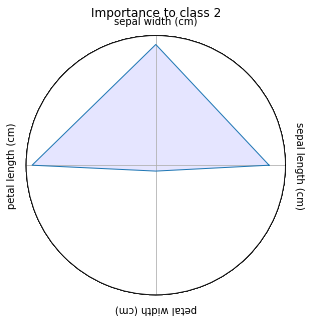

In [77]:
plot_radar(X.columns, (shap_class2[0, :-1] + 1)/2, title='Importance to class 2')

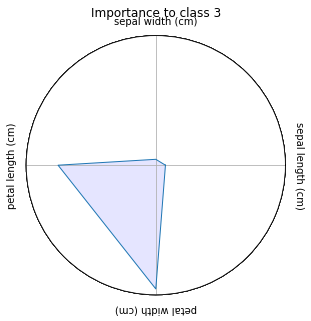

In [78]:
plot_radar(X.columns, (shap_class3[0, :-1] + 1)/2, title='Importance to class 3')

In [85]:
shap_values = kernelexp.shap_values(Xtest)


100%|██████████| 30/30 [00:00<00:00, 42.22it/s]


IndexError: list index out of range

In [89]:
shap.initjs()
shap.force_plot(shap_values[0], Xtest)

In [90]:
shap.force_plot(shap_values[1], Xtest)

In [91]:
shap.force_plot(shap_values[2], Xtest)